<a href="https://colab.research.google.com/github/Lakshman511/EVA4/blob/master/S11/Eva4_S11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from torchvision import datasets
train=datasets.CIFAR10("./data",train=True,download=True)

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
from tqdm import tqdm_notebook
from PIL import Image

In [0]:
a=255
import numpy as np
n=0
s=np.zeros(3)
sq=np.zeros(3)

In [5]:
for data,l in tqdm_notebook(train):
  x=np.array(data)/a
  s+=x.sum(axis=(0,1))
  sq+=np.sum(np.square(x),axis=(0,1))
  n+=x.shape[0]*x.shape[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
mu=s/n
std=np.sqrt((sq/n-np.square(mu)))

In [7]:
print(mu,std)

[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


In [0]:
nms=[mu,std]

In [0]:
import sys
sys.path.append("/content/drive/My Drive/myLibrary")

In [0]:
import numpy as np
from eva4albumentations import Albumentations

In [0]:
a,b=40,3

In [0]:
b=32

In [0]:
c=(1,8,8,True)

In [0]:
p=(a,a,4,None,None,True)

In [0]:
rc=(b,b,True)

In [0]:
test_transforms=Albumentations(nms)
train_transforms=Albumentations(nms,Padding=p,RandomCrop=rc,HorizontalFlip=True,cutout=c)

In [17]:
train=datasets.CIFAR10("./data",train=True,download=True,transform=train_transforms)
test=datasets.CIFAR10("./data",train=False,download=True,transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
import eva4dataloaders

In [0]:
batch_size=512

In [0]:
dataloader=eva4dataloaders.DataLoader(batch_size=batch_size)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

In [0]:
from __future__ import print_function
def unnormalize(img):
  img=img.numpy().astype(dtype=np.float32)
  for i in range(img.shape[0]):
    img[i]=(img[i]*std[i])+mu[i]
  return np.transpose(img,(1,2,0))  

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([512, 3, 32, 32])
torch.Size([512])


In [0]:
num_classes=10
r,c=10,11
n=5
b=14


In [0]:
e=0.01
x=-1.5
y=0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


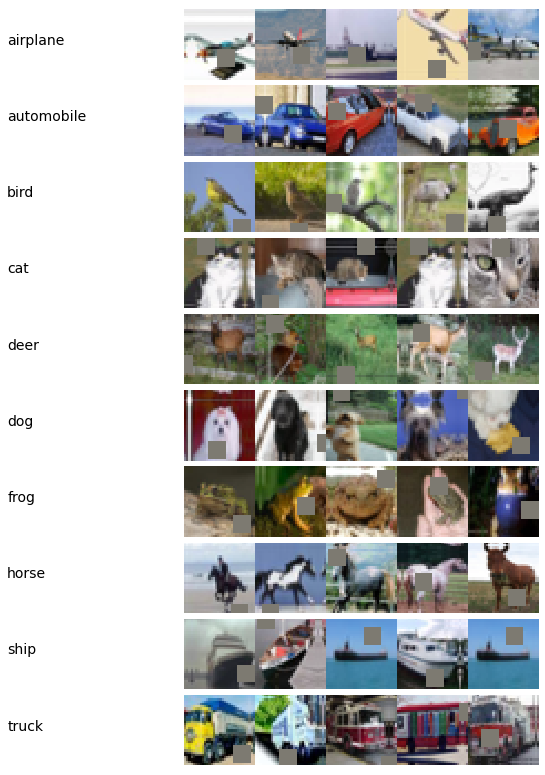

In [26]:
fig=plt.figure(figsize=(b,b))
fig.subplots_adjust(hspace=e,wspace=e)
for i in range(num_classes):
  idx=np.random.choice(np.where(labels[:]==i)[0],n)
  ax=plt.subplot(r,c,i*c+1)
  ax.text(x,y,class_names[i],fontsize=b)
  plt.axis('off')
  for j in range(1,n+1):
    plt.subplot(r,c,i*c+j+1)
    plt.imshow(unnormalize(images[idx[j-1]]),interpolation='none')
    plt.axis('off')
plt.show()    

In [0]:
import eva4models11

In [0]:
model=eva4models11.ResNetforS11().to("cuda")

In [0]:
from eva4statsmanager import StatsManager

In [0]:
statsmanager=StatsManager()

In [31]:
model.summary((3,32,32 ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,


Validation loss decreased (100000.000000 --> 1.856494).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0042, Accuracy: 23.03%; Test set: Average loss: 1.8565, Accuracy: 32.63%
Learning Rate = 0.000100



Validation loss decreased (1.856494 --> 1.622854).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0035, Accuracy: 36.19%; Test set: Average loss: 1.6229, Accuracy: 41.66%
Learning Rate = 0.000140



Validation loss decreased (1.622854 --> 1.450004).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0031, Accuracy: 42.78%; Test set: Average loss: 1.4500, Accuracy: 48.14%
Learning Rate = 0.000196



Validation loss decreased (1.450004 --> 1.320205).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0028, Accuracy: 48.63%; Test set: Average loss: 1.3202, Accuracy: 52.16%
Learning Rate = 0.000274



Validation loss decreased (1.320205 --> 1.223722).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0026, Accuracy: 53.07%; Test set: Average loss: 1.2237, Accuracy: 56.45%
Learning Rate = 0.000384



Validation loss decreased (1.223722 --> 1.122021).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0024, Accuracy: 56.88%; Test set: Average loss: 1.1220, Accuracy: 59.83%
Learning Rate = 0.000538



Validation loss decreased (1.122021 --> 1.029470).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0022, Accuracy: 60.64%; Test set: Average loss: 1.0295, Accuracy: 62.83%
Learning Rate = 0.000753



Validation loss decreased (1.029470 --> 0.978172).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0020, Accuracy: 64.04%; Test set: Average loss: 0.9782, Accuracy: 65.02%
Learning Rate = 0.001054



Validation loss decreased (0.978172 --> 0.885349).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0018, Accuracy: 67.24%; Test set: Average loss: 0.8853, Accuracy: 68.34%
Learning Rate = 0.001476



Validation loss decreased (0.885349 --> 0.783877).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0017, Accuracy: 70.10%; Test set: Average loss: 0.7839, Accuracy: 72.24%
Learning Rate = 0.002066



Validation loss decreased (0.783877 --> 0.717726).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0015, Accuracy: 72.55%; Test set: Average loss: 0.7177, Accuracy: 74.85%
Learning Rate = 0.002893



Validation loss decreased (0.717726 --> 0.673033).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0014, Accuracy: 74.79%; Test set: Average loss: 0.6730, Accuracy: 76.29%
Learning Rate = 0.004050



Epoch: 13, Train set: Average loss: 0.0013, Accuracy: 76.05%; Test set: Average loss: 0.8543, Accuracy: 73.08%
Learning Rate = 0.005669



Epoch: 14, Train set: Average loss: 0.0014, Accuracy: 76.51%; Test set: Average loss: 0.7379, Accuracy: 75.31%
Learning Rate = 0.007937



Validation loss decreased (0.673033 --> 0.665639).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0015, Accuracy: 75.98%; Test set: Average loss: 0.6656, Accuracy: 77.30%
Learning Rate = 0.011112



Validation loss decreased (0.665639 --> 0.653349).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0017, Accuracy: 75.23%; Test set: Average loss: 0.6533, Accuracy: 80.23%
Learning Rate = 0.015557



Validation loss decreased (0.653349 --> 0.621351).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0021, Accuracy: 74.35%; Test set: Average loss: 0.6214, Accuracy: 80.55%
Learning Rate = 0.021780



Validation loss decreased (0.621351 --> 0.552019).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0020, Accuracy: 74.88%; Test set: Average loss: 0.5520, Accuracy: 82.70%
Learning Rate = 0.030491



Epoch: 19, Train set: Average loss: 0.0042, Accuracy: 65.13%; Test set: Average loss: 0.6017, Accuracy: 80.00%
Learning Rate = 0.042688



Epoch: 20, Train set: Average loss: 0.0016, Accuracy: 77.14%; Test set: Average loss: 0.5661, Accuracy: 81.38%
Learning Rate = 0.059763



Epoch: 21, Train set: Average loss: 0.0017, Accuracy: 77.15%; Test set: Average loss: 0.5805, Accuracy: 81.61%
Learning Rate = 0.083668



Epoch: 22, Train set: Average loss: 0.0011, Accuracy: 82.29%; Test set: Average loss: 0.6471, Accuracy: 79.72%
Learning Rate = 0.117136



Epoch: 23, Train set: Average loss: 0.0046, Accuracy: 39.41%; Test set: Average loss: 1.4479, Accuracy: 48.00%
Learning Rate = 0.163990



Epoch: 24, Train set: Average loss: 0.0023, Accuracy: 58.63%; Test set: Average loss: 0.9538, Accuracy: 66.36%
Learning Rate = 0.229586



Epoch: 25, Train set: Average loss: 0.0016, Accuracy: 71.76%; Test set: Average loss: 0.6297, Accuracy: 78.58%
Learning Rate = 0.321420



Epoch: 26, Train set: Average loss: 0.0014, Accuracy: 76.06%; Test set: Average loss: 0.7268, Accuracy: 76.08%
Learning Rate = 0.449988



Epoch: 27, Train set: Average loss: 0.0013, Accuracy: 77.66%; Test set: Average loss: 0.6627, Accuracy: 77.43%
Learning Rate = 0.629983



Epoch: 28, Train set: Average loss: 0.0013, Accuracy: 77.67%; Test set: Average loss: 0.5724, Accuracy: 81.29%
Learning Rate = 0.881976



Epoch: 29, Train set: Average loss: 0.0014, Accuracy: 75.73%; Test set: Average loss: 0.6830, Accuracy: 78.68%
Learning Rate = 1.234767



Epoch: 30, Train set: Average loss: 179210280906.5368, Accuracy: 14.92%; Test set: Average loss: 57587529534698160.0000, Accuracy: 8.29%
Learning Rate = 1.728674



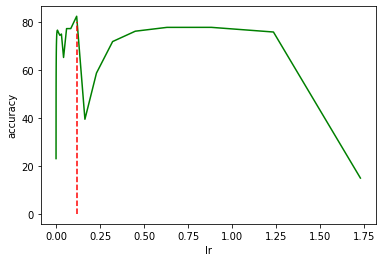

In [32]:
from eva4lr_range_test import LRrangeTest
lrtester=LRrangeTest()
max_lr=lrtester.lr_range_test(model,train_loader,test_loader)

In [0]:
import torch.nn as nn

In [0]:
def reset(m):
  if isinstance(m,nn.Conv2d) or isinstance(m,nn.BatchNorm2d):
    m.reset_parameters()

In [0]:
model.apply(reset)

In [0]:
max_lr=int(max_lr*100)/100
min_lr=max_lr/10#max_la

In [37]:
print(min_lr,max_lr)

0.011 0.11


In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

In [0]:
L2lambda=0
EPOCHS=24
a=10
b=0.2

In [0]:
optimizer=optim.SGD(model.parameters(),lr=min_lr,momentum=0.9,nesterov=True,weight_decay=L2lambda)#)

In [0]:
scheduler=OneCycleLR(optimizer,max_lr=max_lr,steps_per_epoch=len(train_loader),pct_start=b,epochs=EPOCHS,div_factor=a,final_div_factor=10,anneal_strategy="linear")

In [42]:
model.gotrain(optimizer,train_loader,test_loader,EPOCHS,"/content/drive/My Drive",statsmanager,scheduler,True,0)


Validation loss decreased (100000.000000 --> 2.215211).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0068, Accuracy: 17.83%; Test set: Average loss: 2.2152, Accuracy: 25.29%
Learning Rate = 0.031669



Epoch: 2, Train set: Average loss: 0.0046, Accuracy: 28.49%; Test set: Average loss: 3.6142, Accuracy: 27.34%
Learning Rate = 0.052338



Validation loss decreased (2.215211 --> 1.696096).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0041, Accuracy: 38.91%; Test set: Average loss: 1.6961, Accuracy: 41.85%
Learning Rate = 0.073007



Validation loss decreased (1.696096 --> 1.336737).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0036, Accuracy: 45.21%; Test set: Average loss: 1.3367, Accuracy: 53.85%
Learning Rate = 0.093676



Validation loss decreased (1.336737 --> 1.264542).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0027, Accuracy: 55.81%; Test set: Average loss: 1.2645, Accuracy: 56.19%
Learning Rate = 0.108808



Validation loss decreased (1.264542 --> 1.183596).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0021, Accuracy: 64.04%; Test set: Average loss: 1.1836, Accuracy: 64.36%
Learning Rate = 0.103136



Validation loss decreased (1.183596 --> 0.846457).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0018, Accuracy: 69.16%; Test set: Average loss: 0.8465, Accuracy: 70.53%
Learning Rate = 0.097464



Validation loss decreased (0.846457 --> 0.667744).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0015, Accuracy: 73.66%; Test set: Average loss: 0.6677, Accuracy: 77.27%
Learning Rate = 0.091792



Validation loss decreased (0.667744 --> 0.602400).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0013, Accuracy: 76.86%; Test set: Average loss: 0.6024, Accuracy: 79.84%
Learning Rate = 0.086120



Validation loss decreased (0.602400 --> 0.591734).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0012, Accuracy: 79.20%; Test set: Average loss: 0.5917, Accuracy: 80.00%
Learning Rate = 0.080448



Validation loss decreased (0.591734 --> 0.541895).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0011, Accuracy: 80.98%; Test set: Average loss: 0.5419, Accuracy: 81.76%
Learning Rate = 0.074776



Epoch: 12, Train set: Average loss: 0.0010, Accuracy: 82.74%; Test set: Average loss: 0.5776, Accuracy: 80.03%
Learning Rate = 0.069105



Validation loss decreased (0.541895 --> 0.469158).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0009, Accuracy: 84.19%; Test set: Average loss: 0.4692, Accuracy: 84.15%
Learning Rate = 0.063433



Validation loss decreased (0.469158 --> 0.446791).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0008, Accuracy: 85.71%; Test set: Average loss: 0.4468, Accuracy: 85.11%
Learning Rate = 0.057761



Epoch: 15, Train set: Average loss: 0.0008, Accuracy: 86.43%; Test set: Average loss: 0.4694, Accuracy: 84.57%
Learning Rate = 0.052089



Validation loss decreased (0.446791 --> 0.420212).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0007, Accuracy: 87.55%; Test set: Average loss: 0.4202, Accuracy: 86.07%
Learning Rate = 0.046417



Validation loss decreased (0.420212 --> 0.405019).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0006, Accuracy: 88.70%; Test set: Average loss: 0.4050, Accuracy: 86.70%
Learning Rate = 0.040745



Epoch: 18, Train set: Average loss: 0.0006, Accuracy: 89.48%; Test set: Average loss: 0.4192, Accuracy: 86.26%
Learning Rate = 0.035073



Validation loss decreased (0.405019 --> 0.376727).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0005, Accuracy: 90.26%; Test set: Average loss: 0.3767, Accuracy: 87.37%
Learning Rate = 0.029401



Epoch: 20, Train set: Average loss: 0.0005, Accuracy: 90.98%; Test set: Average loss: 0.3960, Accuracy: 87.20%
Learning Rate = 0.023730



Epoch: 21, Train set: Average loss: 0.0005, Accuracy: 91.90%; Test set: Average loss: 0.3874, Accuracy: 87.83%
Learning Rate = 0.018058



Validation loss decreased (0.376727 --> 0.372391).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0004, Accuracy: 92.63%; Test set: Average loss: 0.3724, Accuracy: 88.14%
Learning Rate = 0.012386



Validation loss decreased (0.372391 --> 0.359980).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0004, Accuracy: 93.36%; Test set: Average loss: 0.3600, Accuracy: 88.95%
Learning Rate = 0.006714



Validation loss decreased (0.359980 --> 0.342865).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0003, Accuracy: 94.48%; Test set: Average loss: 0.3429, Accuracy: 89.10%
Learning Rate = 0.001042



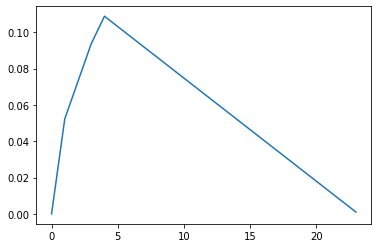

In [43]:
plt.plot(statsmanager.data["lr"])

In [0]:
from plots import plots

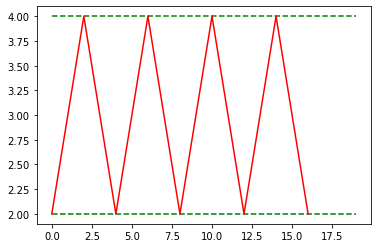

In [45]:
pl=plots()
pl.triangularPlot(2,4,4,4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


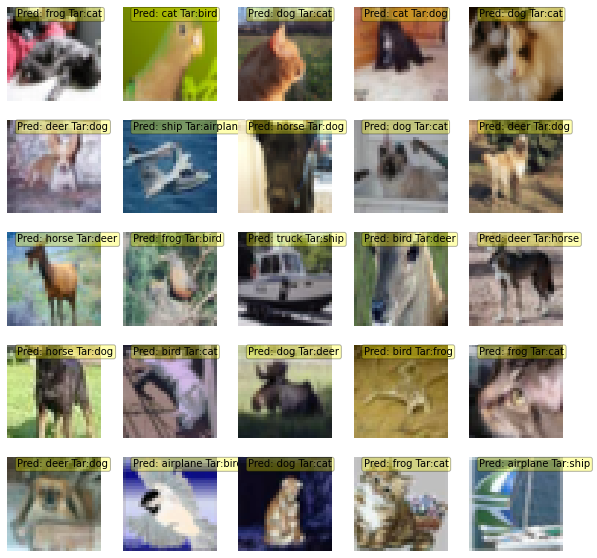

In [46]:
statsmanager.plot_misclassified_25()